In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [6]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [10]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## **Data Preprocessing**

In [13]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [14]:
x = df.drop(columns = ['math score'], axis = 1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
numerical_df = x.select_dtypes(exclude = 'object').columns

In [16]:
numerical_df

Index(['reading score', 'writing score'], dtype='object')

In [17]:
categorical_df = x.select_dtypes(include = 'object').columns
categorical_df

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [18]:
categorical_df = [feature for feature in categorical_df if feature != 'parental level of education']
categorical_df

['gender', 'race/ethnicity', 'lunch', 'test preparation course']

In [19]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [20]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [21]:
ordinal_encoder = OrdinalEncoder(categories = [['some high school', 'high school', 'some college',
                                               "associate's degree", "bachelor's degree",
                                              "master's degree"]])

In [22]:
preprocessing = ColumnTransformer([
    ('OneHotEncoder', one_hot_encoder, categorical_df),
    ('OrdinalEncoder', ordinal_encoder, ['parental level of education']),
    ('StandardScaler', scaler, numerical_df)
])

In [23]:
x = preprocessing.fit_transform(x)

In [24]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  4.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  5.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.15336989,  1.18158627]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

## **Model Training**

In [26]:
def evaluate_model(actual, predicted):
    
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(mean_squared_error(actual, predicted))
    R2_Score = r2_score(actual, predicted)
    
    return MAE, MSE, RMSE, R2_Score

In [27]:
models = {
    "Linear Regression" :LinearRegression(),
    "Logistic Regression":LogisticRegression(),
    "KNN Regressor" : KNeighborsRegressor(),
    "Desision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGB Model" : XGBRegressor()
}

In [28]:
models_list = []
r2_list = []

In [29]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Train_MAE , Train_MSE, Train_RMSE, Train_R2 = evaluate_model(y_train, y_train_pred)
    Test_MAE, Test_MSE, Test_RMSE, Test_R2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("Model Training Performance: ")
    print("Mean Absolute Error = ", Train_MAE)
    print("Mean Squared  Error = ", Train_MSE)
    print("Root Mean Squared  Error = ", Train_RMSE)
    print("R2 Score Error = ", Train_R2)
    
    print('--------------------------------------------')
    
    print("Model Testing Performance: ")
    print("Mean Absolute Error = ", Test_MAE)
    print("Mean Squared  Error = ", Test_MSE)
    print("Root Mean Squared  Error = ", Test_RMSE)
    print("R2 Score Error = ", Test_R2)

    r2_list.append(Test_R2)

Linear Regression
Model Training Performance: 
Mean Absolute Error =  4.250666666666667
Mean Squared  Error =  28.225169270833334
Root Mean Squared  Error =  5.312736514342993
R2 Score Error =  0.8735367985753442
--------------------------------------------
Model Testing Performance: 
Mean Absolute Error =  4.327625
Mean Squared  Error =  29.91429296875
Root Mean Squared  Error =  5.469396033270035
R2 Score Error =  0.8784088953417316
Logistic Regression
Model Training Performance: 
Mean Absolute Error =  5.628
Mean Squared  Error =  57.513333333333335
Root Mean Squared  Error =  7.58375456705538
R2 Score Error =  0.7423108365393352
--------------------------------------------
Model Testing Performance: 
Mean Absolute Error =  6.856
Mean Squared  Error =  77.496
Root Mean Squared  Error =  8.803181243164314
R2 Score Error =  0.6850059516218308
KNN Regressor
Model Training Performance: 
Mean Absolute Error =  4.5229333333333335
Mean Squared  Error =  32.24528
Root Mean Squared  Error = 

In [30]:
scores_df = pd.DataFrame(list(zip(models_list, r2_list)), 
        columns = ['Model Name', 'R2_Score']).sort_values(by = ['R2_Score'], ascending = False)

In [31]:
scores_df

,Model Name,R2_Score
0,Linear Regression,0.878409
4,Random Forest,0.850420
5,XGB Model,0.827396
2,KNN Regressor,0.792453
3,Desision Tree,0.765210
1,Logistic Regression,0.685006


In [32]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

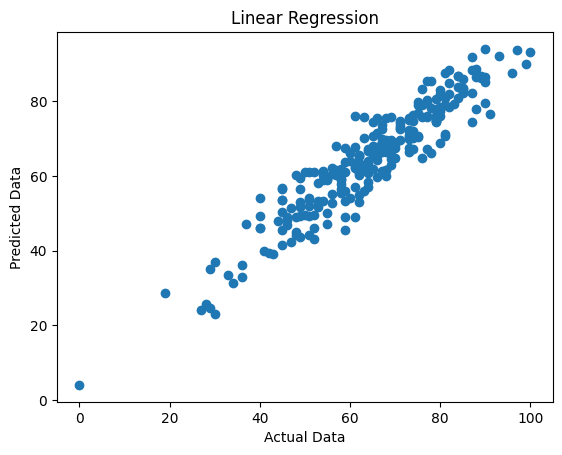

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title("Linear Regression")
plt.show()

<Axes: xlabel='math score'>

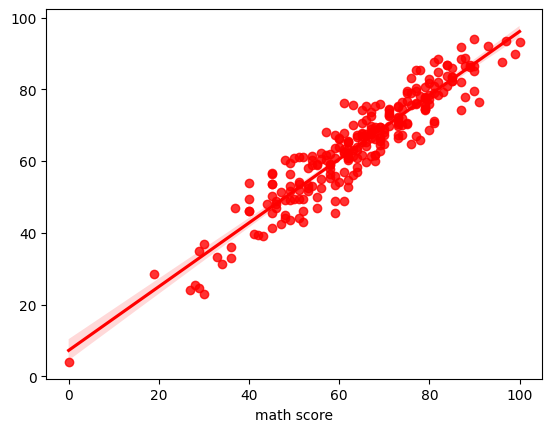

In [34]:
sns.regplot(x = y_test, y = y_pred , color = 'red')

In [35]:
prediction_df = pd.DataFrame({'Actual Values': y_test,
                             'Predicted Values' : y_pred,
                             'Diffirance' : y_test  - y_pred})

In [36]:
prediction_df

,Actual Values,Predicted Values,Diffirance
521,91,76.43750,14.56250
737,53,58.15625,-5.15625
740,80,77.28125,2.71875
660,74,76.34375,-2.34375
411,84,86.84375,-2.84375
...,...,...,...
109,70,64.68750,5.31250
430,64,63.15625,0.84375
77,80,82.90625,-2.90625
84,42,39.28125,2.71875
